In [ ]:
import librosa
from google.colab import drive
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/guitar.wav')
y1, sr1 = librosa.load('/content/drive/MyDrive/Colab Notebooks/bibi.wav')
print(y)
print(len(y))
print('sampling rate(HZ) : %d' %sr)
print('Audio length (seconds): %.2f' % (len(y)/sr))

[0. 0. 0. ... 0. 0. 0.]
2013185
sampling rate(HZ) : 22050
Audio length (seconds): 91.30


In [ ]:
import IPython.display as ipd
ipd.Audio(y,rate=sr)

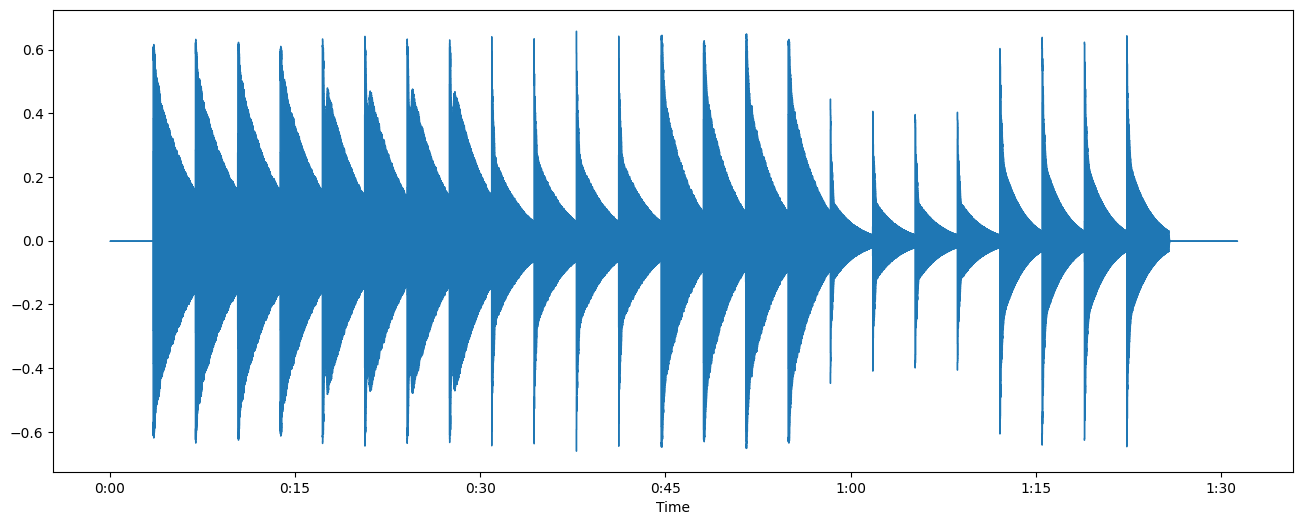

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y, sr=sr)
plt.show()

In [ ]:
import numpy as np
D = np.abs(librosa.stft(y,n_fft=2048, hop_length=512))
print(D.shape)

#plt.figure(figsize=(16,6))
#plt.plot(D)
#plt.show()

# 주어진 오디오 신호와 STFT 파라미터로 STFT 수행
D = librosa.stft(y, n_fft=2048, hop_length=512)

(1025, 3933)


array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       1.10034668e+04, 1.10142334e+04, 1.10250000e+04])

In [ ]:
# Extracting the chroma features and onsets
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

first = True
notes = []

for onset in onset_frames:
  chroma_at_onset = chroma[:, onset]
  note_pitch = chroma_at_onset.argmax()
  # 나머지 note 처리
  if not first:
      note_duration = librosa.frames_to_time(onset, sr=sr)
      notes.append((note_pitch,onset, note_duration - prev_note_duration))
      prev_note_duration = note_duration
  # 첫 번째 note 처리
  else:
      prev_note_duration = librosa.frames_to_time(onset, sr=sr)
      first = False
print("midi_to_note \t Note pitch by midi \t Onset frame \t Note duration")
for entry in notes:
  print(librosa.midi_to_note(entry[0]),'\t\t\t',entry[0],'\t\t',entry[1],'\t\t',entry[2])

midi_to_note 	 Note pitch by midi 	 Onset frame 	 Note duration
B-1 			 11 		 298 		 3.436553287981859
B-1 			 11 		 445 		 3.413333333333334
B-1 			 11 		 593 		 3.4365532879818588
A-1 			 9 		 741 		 3.4365532879818588
A-1 			 9 		 888 		 3.413333333333334
A-1 			 9 		 1036 		 3.4365532879818588
A-1 			 9 		 1184 		 3.4365532879818588
D-1 			 2 		 1331 		 3.413333333333334
D-1 			 2 		 1479 		 3.4365532879818623
D-1 			 2 		 1627 		 3.4365532879818588
D-1 			 2 		 1774 		 3.413333333333334
G-1 			 7 		 1922 		 3.4365532879818588
G-1 			 7 		 2070 		 3.4365532879818588
G-1 			 7 		 2217 		 3.413333333333334
G-1 			 7 		 2365 		 3.4365532879818588
B-1 			 11 		 2512 		 3.413333333333334
B-1 			 11 		 2660 		 3.4365532879818588
B-1 			 11 		 2808 		 3.4365532879818588
B-1 			 11 		 2955 		 3.413333333333327
E-1 			 4 		 3103 		 3.436553287981866
E-1 			 4 		 3251 		 3.436553287981866
E-1 			 4 		 3398 		 3.413333333333327
E-1 			 4 		 3546 		 3.436553287981866


In [ ]:
#onset을 기준으로 note_pitch를 구해서(midi type으로 리턴함), note_pitch를 midi_to_note로 note 형태로 바꾸고,
#note의 빈도수를 계산해서 가장 많이 나오는 note를 해당 음악의 음역대로 추정해봤음
#웬디에릭남의 봄인가봐의 노래를 분석했고, web에서 제공한 B의 키가 나왔음
# B-1은 옥타브 1에서의 B를 의미함.

from collections import Counter

# Extracting the chroma features and onsets
chroma = librosa.feature.chroma_stft(y=y1, sr=sr)
onset_frames = librosa.onset.onset_detect(y=y1, sr=sr)

first = True
notes = []
midi_notes = []
for onset in onset_frames:
    chroma_at_onset = chroma[:, onset]
    note_pitch = chroma_at_onset.argmax()
    # For all other notes
    if not first:
        note_duration = librosa.frames_to_time(onset, sr=sr)
        midi_notes.append(note_pitch)
        notes.append(librosa.midi_to_note(note_pitch))
        prev_note_duration = note_duration
    # For the first note
    else:
        prev_note_duration = librosa.frames_to_time(onset, sr=sr)
        first = False

# Counting note frequencies
find_main_key = Counter(notes)

print("이 노래에 사용된 key:", find_main_key)
print("가장 많이 나온 Key:", find_main_key.most_common(1)[0][0])


이 노래에 사용된 key: Counter({'E-1': 93, 'G♯-1': 87, 'B-1': 68, 'F♯-1': 55, 'G-1': 44, 'C♯-1': 31, 'A-1': 27, 'A♯-1': 20, 'C-1': 16, 'F-1': 9, 'D♯-1': 9, 'D-1': 5})
가장 많이 나온 Key: E-1
